__Задание на повторение:__
Задание не обязательно к выполнению, но очень рекомендуется для понимания набора данных, этот набор данных будет использован и для следующего домашнего задания.

- Задание 1: Построить график распределения времени совершения транзакции для обучающей / тестовой выборки, сделать выводы о том, как разбиты данные и какие виды валидации могут подойти для данной задачи.

- Задание 2: построить scatter-plot зависимости суммы транзакции от времени совершения транзакции. Построить графики для обучающей выборки и для тестовой выборки, для обучающей выборки - построить как для целевой переменной = 0, так и для переменной = 1. Сделать выводы.

- Задание 3: построить распределение признака TransactionAmt в логарифмическом масштабе, сделать выводы о близости распредления к нормальному распределению. Построить распределение признака в логарифмическому масштабе для обучающей выборк и для тестовой выборки, сделать выводы.

- Задание 4: построить распределение признака целевой переменной в зависимости от значений категориальных признаков ProductCD, card4, card6. Сделать выводы.

In [1]:
from typing import List, Optional
from tqdm import tqdm

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import scipy.stats as st
from scipy.stats import probplot, ks_2samp

from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted
import missingno as msno
import xgboost as xgb
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
test_path = '/content/drive/MyDrive/Colab Notebooks/Datasets/Kaggle_course/data_HW2/assignment_2_test.csv'

In [4]:
train_path = '/content/drive/MyDrive/Colab Notebooks/Datasets/Kaggle_course/data_HW2/assignment_2_train.csv'

In [5]:
df_train = pd.read_csv(train_path)

In [6]:
df_train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,50.0,1758.0,925.0,0.0,354.0,0.0,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df_test = pd.read_csv(test_path)

In [8]:
df_test.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3287000,1,7415038,226.00,W,12473,555.0,150.0,visa,226.0,credit,299.0,87.0,116.0,NaN,aol.com,NaN,2.0,3.0,0.0,0.0,0.0,5.0,0.0,0.0,3.0,0.0,3.0,2.0,6.0,2.0,4.0,4.0,0.0,4.0,3.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,452.000000,2924.000000,2924.000000,0.0,412.0,0.0,412.0,206.0,412.0,412.0,452.0,2512.0,2512.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3287001,0,7415054,3072.00,W,15651,417.0,150.0,visa,226.0,debit,330.0,87.0,NaN,NaN,yahoo.com,NaN,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,1.0,1.0,0.0,0.0,0.0,1.0,3059.949951,3059.949951,3059.949951,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3059.949951,3059.949951,3059.949951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3287002,0,7415081,319.95,W,13844,583.0,150.0,visa,226.0,credit,126.0,87.0,9.0,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,1.0,1.0,0.0,0.0,0.0,1.0,319.950012,319.950012,319.950012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,319.950012,319.950012,319.950012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3287003,0,7415111,171.00,W,11556,309.0,150.0,visa,226.0,debit,181.0,87.0,3.0,NaN,anonymous.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0,6.0,6.0,6.0,6.0,6.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,59.000000,59.000000,0.0,59.0,0.0,59.0,59.0,59.0,59.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3287004,0,7415112,107.95,W,10985,555.0,150.0,visa,226.0,debit,231.0,87.0,0.0,NaN,anonymous.com,NaN,2.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,10.0,2.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#Задание 1. Время совершения транзакции - TransactionDt.

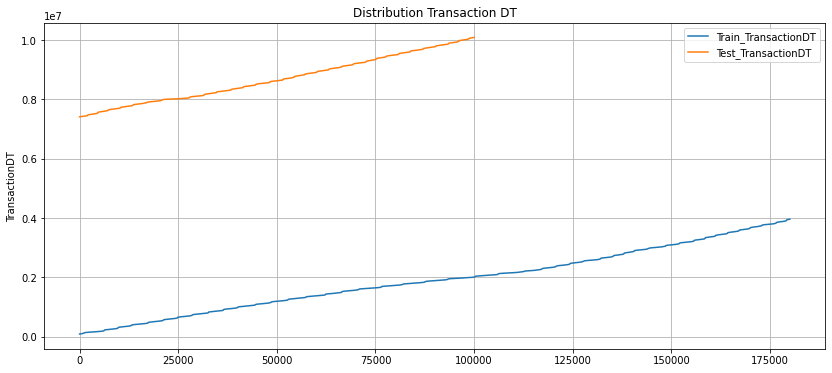

In [12]:
plt.figure(figsize=(14,6))
plt.title("Distribution Transaction DT")
sns.lineplot(data=df_train['TransactionDT'], label="Train_TransactionDT")
sns.lineplot(data=df_test['TransactionDT'], label="Test_TransactionDT")
plt.grid()

In [ ]:
# И на тесте и на трейне TransactionDT линейно увеличивается. Я бы попробовал Time based validation, Stratified Kfold. 

In [15]:
#Задание2

In [13]:
train_class0, train_class1 = df_train[df_train['isFraud']==0], df_train[df_train['isFraud']==1]

In [14]:
test_class0, test_class1 = df_test[df_test['isFraud']==0], df_test[df_test['isFraud']==1]

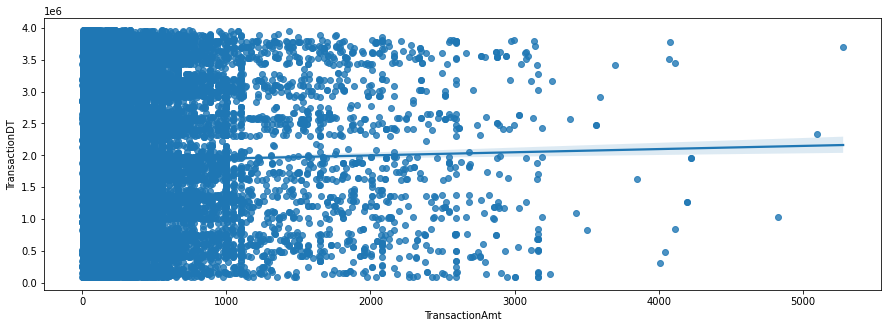

In [43]:
data = train_class0[["TransactionAmt", "TransactionDT"]]
data = train_class0.sort_values(by="TransactionAmt").reset_index(drop=True)
fig, axes = plt.subplots(1, 1, figsize=(15, 5))

sns.regplot(
    x="TransactionAmt",
    y="TransactionDT",
    data=data,
    ax=axes
)

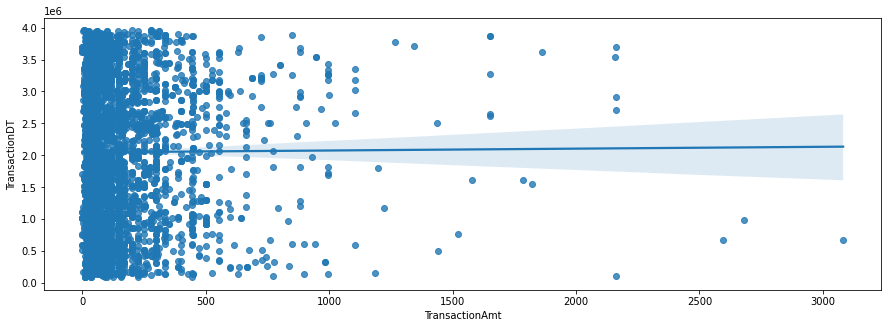

In [44]:
data = train_class1[["TransactionAmt", "TransactionDT"]]
data = train_class1.sort_values(by="TransactionAmt").reset_index(drop=True)
fig, axes = plt.subplots(1, 1, figsize=(15, 5))

sns.regplot(
    x="TransactionAmt",
    y="TransactionDT",
    data=data,
    ax=axes
)

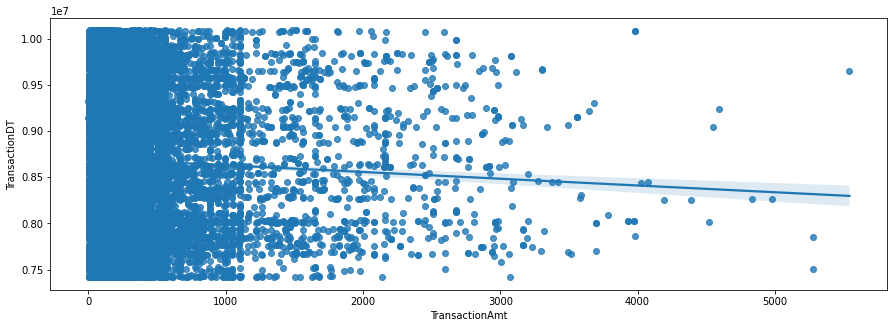

In [45]:
data = test_class0[["TransactionAmt", "TransactionDT"]]
data = test_class0.sort_values(by="TransactionAmt").reset_index(drop=True)
fig, axes = plt.subplots(1, 1, figsize=(15, 5))

sns.regplot(
    x="TransactionAmt",
    y="TransactionDT",
    data=data,
    ax=axes
)

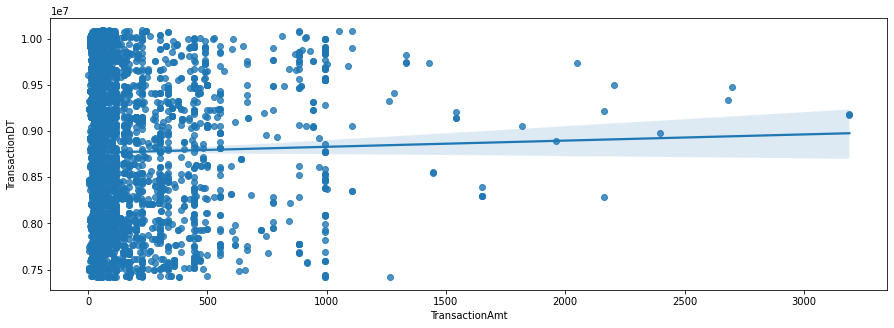

In [46]:
data = test_class1[["TransactionAmt", "TransactionDT"]]
data = test_class1.sort_values(by="TransactionAmt").reset_index(drop=True)
fig, axes = plt.subplots(1, 1, figsize=(15, 5))

sns.regplot(
    x="TransactionAmt",
    y="TransactionDT",
    data=data,
    ax=axes
)

In [47]:
#Max transactionAmt: 3000 на тесте, 5000 - трейн. TransactionDT=const или очень близко к нему на всех графиках (тест, трейн)

In [ ]:
#Задание3

In [ ]:
# Для понимания сначала построим TransactionAmt без логарифмического преобразования. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


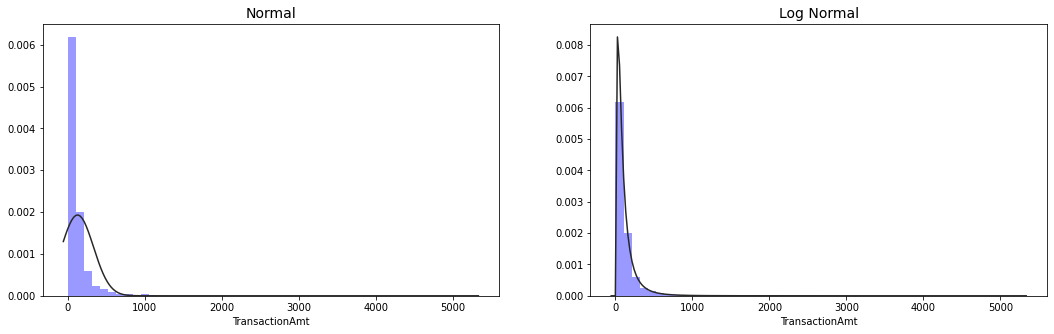

In [19]:
feature_train = df_train["TransactionAmt"]
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

axes[0].set_title("Normal", fontsize=14)
sns.distplot(feature_train, kde=False, color="blue", fit=st.norm, ax=axes[0])

axes[1].set_title("Log Normal", fontsize=14)
sns.distplot(feature_train, kde=False, color="blue", fit=st.lognorm, ax=axes[1])

In [ ]:
#Сильно видно, что распределение далеко от нормального. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


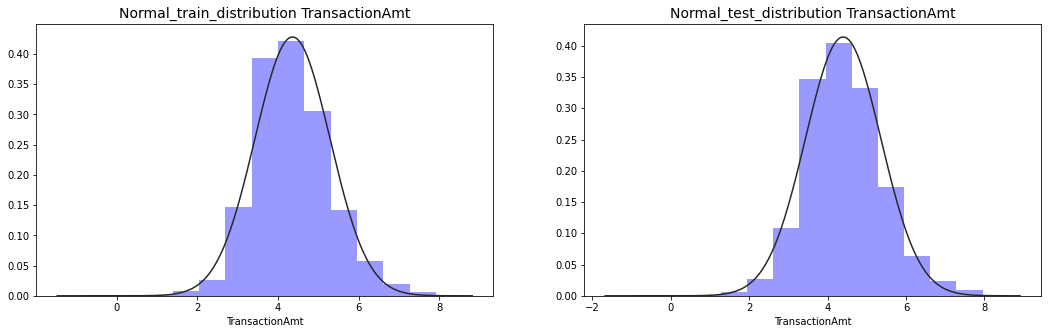

In [21]:
feature_train = np.log(df_train["TransactionAmt"])
feature_test = np.log(df_test['TransactionAmt'])
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

axes[0].set_title("Normal_train_distribution TransactionAmt", fontsize=14)
sns.distplot(feature_train, bins=15, kde=False, color="blue", fit=st.norm, ax=axes[0])

axes[1].set_title("Normal_test_distribution TransactionAmt", fontsize=14)
sns.distplot(feature_test, bins=15, kde=False, color="blue", fit=st.norm, ax=axes[1])

In [22]:
#Вывод: на тесте и на трейне логарифмическое распределение TransactionAmt близко к нормальному. 

In [ ]:
# Задание 4. 

In [23]:
target = 'isFraud'

In [34]:
features = ['ProductCD', 'card4', 'card6', 'isFraud']

In [35]:
df_train[features].head()

,ProductCD,card4,card6,isFraud
0,W,discover,credit,0
1,W,mastercard,credit,0
2,W,visa,debit,0
3,W,mastercard,debit,0
4,H,mastercard,credit,0


In [37]:
df_train[['ProductCD', 'card4', 'card6']].isna().sum()

ProductCD    0
card4        0
card6        7
dtype: int64

In [38]:
df_train['card4'] = df_train['card4'].fillna('unknown')
df_train['card6'] = df_train['card6'].fillna('unknown')

In [39]:
def bars_cat_isFraud(idx, df):
    
    ax[idx].barh(df.index, df.values)
    ax[idx].set_xlabel('count isFraud')

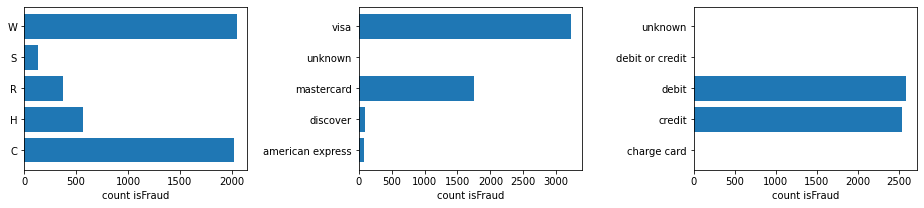

In [40]:
fig, ax = plt.subplots(1, 3, figsize=(16, 3))

bars_cat_isFraud(0, df_train[features].groupby(['ProductCD'])['isFraud'].sum())
bars_cat_isFraud(1, df_train[features].groupby(['card4'])['isFraud'].sum())
bars_cat_isFraud(2, df_train[features].groupby(['card6'])['isFraud'].sum())

plt.subplots_adjust(wspace=0.5)

самое большое количество мошенничества:
- в категории W, С в признаке ProductCD
- visa и mastercard 
- дебетовые и кредитные карты